#### Salary_hike -> Build a prediction model for Salary_hike Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python. EDA and Data Visualization. Correlation Analysis. Model Building. Model Testing. Model Predictions.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv("Salary_data.csv")
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [8]:
data = data.rename({"YearsExperience": "exp","Salary":"salary"},axis = 1)
data

,exp,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exp', ylabel='Density'>

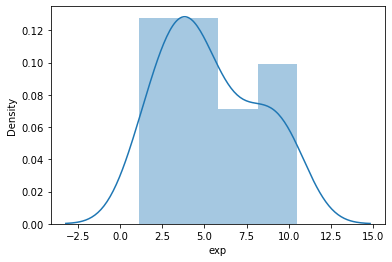

In [9]:
sns.distplot(data["exp"])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

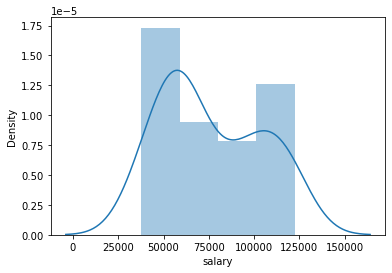

In [10]:
sns.distplot(data["salary"])

In [11]:
data.corr()

,exp,salary
exp,1.000000,0.978242
salary,0.978242,1.000000


<AxesSubplot:xlabel='exp', ylabel='salary'>

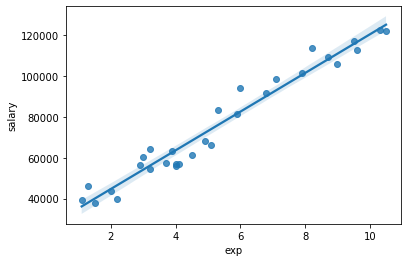

In [12]:
sns.regplot(x="exp",y="salary",data=data)

In [13]:
model = smf.ols("salary~exp",data=data).fit()

In [15]:
model.params

Intercept    25792.200199
exp           9449.962321
dtype: float64

In [16]:
model.tvalues,model.pvalues

(Intercept    11.346940
 exp          24.950094
 dtype: float64,
 Intercept    5.511950e-12
 exp          1.143068e-20
 dtype: float64)

In [17]:
model.rsquared

0.9569566641435086

In [18]:
salary = (25792.200199)+(9449.962321)*3

In [19]:
salary

54142.087162

In [20]:
new_data= pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [23]:
pred = pd.DataFrame(new_data,columns =["exp"])

In [24]:
pred

,exp
0,3
1,5


In [25]:
model.predict(pred)

0    54142.087163
1    73042.011806
dtype: float64